# RSAM & DSAR
The first part of this notebook will apply the z-score normalization.<br>
The fuctions ```zsc``` and ```zsc2``` are from A. Ardid (personal communication).<br>

The second part is simply for ploting the RSAM & DSAR data as well as the z-score normalized data.<br>
Therefore, the script ```run_multiprocessing_RSAM_DSAR.py``` has to be run first before starting with this notebook.

In [5]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
# this is the path to save the figures
dirpath = '../output/RSAM_DSAR/figure/'
os.makedirs(dirpath, exist_ok=True)

## Z-score normalization

In [7]:
def zsc(s):
    # log transform data
    log_s = np.log10(s).replace([np.inf, -np.inf], np.nan).dropna()
    
    # compute mean/std/min
    mn = np.mean(log_s)
    std = np.std(log_s)
    minzsc = np.min(log_s)                                                    

    # Calculate percentile
    s=(np.log10(s)-mn)/std
    s=s.fillna(minzsc)
    s=10**s
    return s

def zsc2(s):
    s=zsc(s)
    s=s.rolling(window=2).min()
    s[0]=s[1]
    return s

In [9]:
for year in range(2004,2004+1):
    all_files = sorted(glob.glob('../output/RSAM_DSAR/data/{}/*/*.csv'.format(year)))
    sta_list = np.unique([file.split('/')[-2] for file in all_files])
#     sta_list = ['YEL']
    for sta in sta_list:
        print(sta)
        sta_files = sorted(glob.glob('../output/RSAM_DSAR/data/{}/{}/*.csv'.format(year,sta)))
        li = []
        for filename in sta_files:
            frame = pd.read_csv(filename)
            li.append(frame)

        df = pd.concat(li, axis=0, ignore_index=True)
#         df['time'] = '2006-10-13 00:00' # for station YEL jday 286
        df.set_index('time',inplace=True)
        df.index = pd.to_datetime(df.index).tz_localize(None)
        df.sort_index()

        # compute transforms and save
        df['zsc2_rsam'] = zsc2(df['rsam'])
        df['zsc2_mf'] = zsc2(df['mf'])
        df['zsc2_hf'] = zsc2(df['hf'])
        df['zsc2_dsar'] = zsc2(df['dsar'])
        df['zsc2_ldsar'] = zsc2(df['ldsar'])
        df['zsc2_lhdsar'] = zsc2(df['lhdsar'])
        df['zsc2_vsar'] = zsc2(df['vsar'])
        df['zsc2_lhvsar'] = zsc2(df['lhvsar'])
        df['zsc2_rms'] = zsc2(df['rms'])
        df['zsc2_rmes'] = zsc2(df['rmes'])
        df['zsc2_pgv'] = zsc2(df['pgv'])
        df['zsc2_pga'] = zsc2(df['pga'])

        df.to_csv('../output/RSAM_DSAR/data/{}/{}/{}_{}_zsc.csv'.format(year,sta,year,sta))

EDM
HSR
SHW


## Plotting

In [11]:
year = 2004
sta = 'EDM'

In [12]:
df = pd.read_csv('../output/RSAM_DSAR/data/{}/{}/{}_{}_zsc.csv'.format(year,sta,year,sta))
df.set_index('time',inplace=True)
df.index = pd.to_datetime(df.index).tz_localize(None)
df = df.resample('10min').median()
df

,rsam,mf,hf,dsar,ldsar,lhdsar,vsar,lhvsar,rms,rmes,...,zsc2_hf,zsc2_dsar,zsc2_ldsar,zsc2_lhdsar,zsc2_vsar,zsc2_lhvsar,zsc2_rms,zsc2_rmes,zsc2_pgv,zsc2_pga
time,,,,,,,,,,,,,,,,,,,,,
2004-01-02 00:00:00,8.584847,5.556000,8.070138,1.592656,2.704496,4.307332,0.688463,1.063777,0.000001,6.943190e-07,...,0.042131,6.699631,2.051929,17.805576,4.820059,16.181519,0.434180,0.218103,0.553461,0.260846
2004-01-02 00:10:00,9.613023,6.123679,9.360710,1.468068,2.903093,4.261938,0.654190,1.026954,0.000002,1.030697e-06,...,0.042131,6.699631,2.051929,17.805576,4.820059,16.181519,0.434180,0.218103,0.553461,0.260846
2004-01-02 00:20:00,9.804946,5.882808,9.748439,1.340257,3.103018,4.158841,0.603462,1.005797,0.000002,1.304404e-06,...,0.101251,3.257221,7.152362,14.572358,2.629952,13.804042,0.584738,1.740641,0.553461,0.263948
2004-01-02 00:30:00,9.407030,5.956591,9.466381,1.366992,2.946893,4.028379,0.629236,0.993730,0.000002,7.008753e-07,...,0.108196,3.257221,9.312125,11.226875,2.629952,12.589134,0.500921,0.229151,0.592566,0.177313
2004-01-02 00:40:00,10.675639,6.727851,8.885789,1.692724,2.898188,4.905832,0.757147,1.201428,0.000001,7.852504e-07,...,0.074430,3.808580,6.942407,11.226875,3.599834,12.589134,0.412216,0.229151,0.491370,0.168567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-01-05 23:10:00,10.989722,7.897448,12.531979,1.415402,2.680577,3.794094,0.630184,0.876934,0.000001,6.991733e-07,...,0.567943,4.450526,1.754595,6.690930,3.287854,4.282633,0.254228,0.159153,0.273948,0.413871
2004-01-05 23:20:00,11.496308,7.734873,12.501707,1.389685,2.940136,4.085861,0.618705,0.919579,0.000002,9.234207e-07,...,0.559883,4.338864,1.754595,6.875694,3.171513,4.847270,0.312244,0.226240,0.273948,0.335525
2004-01-05 23:30:00,16.249348,12.013745,18.626759,1.399520,2.676181,3.745369,0.644972,0.872366,0.000022,1.310163e-06,...,0.559883,4.338864,1.704578,6.185586,3.171513,4.657813,0.540353,0.976696,0.554718,0.335525


In [13]:
df = df.rolling('1H').median()

Solid lines represent the feature value.<br>
Dashed lines represent the z-score normalized features.

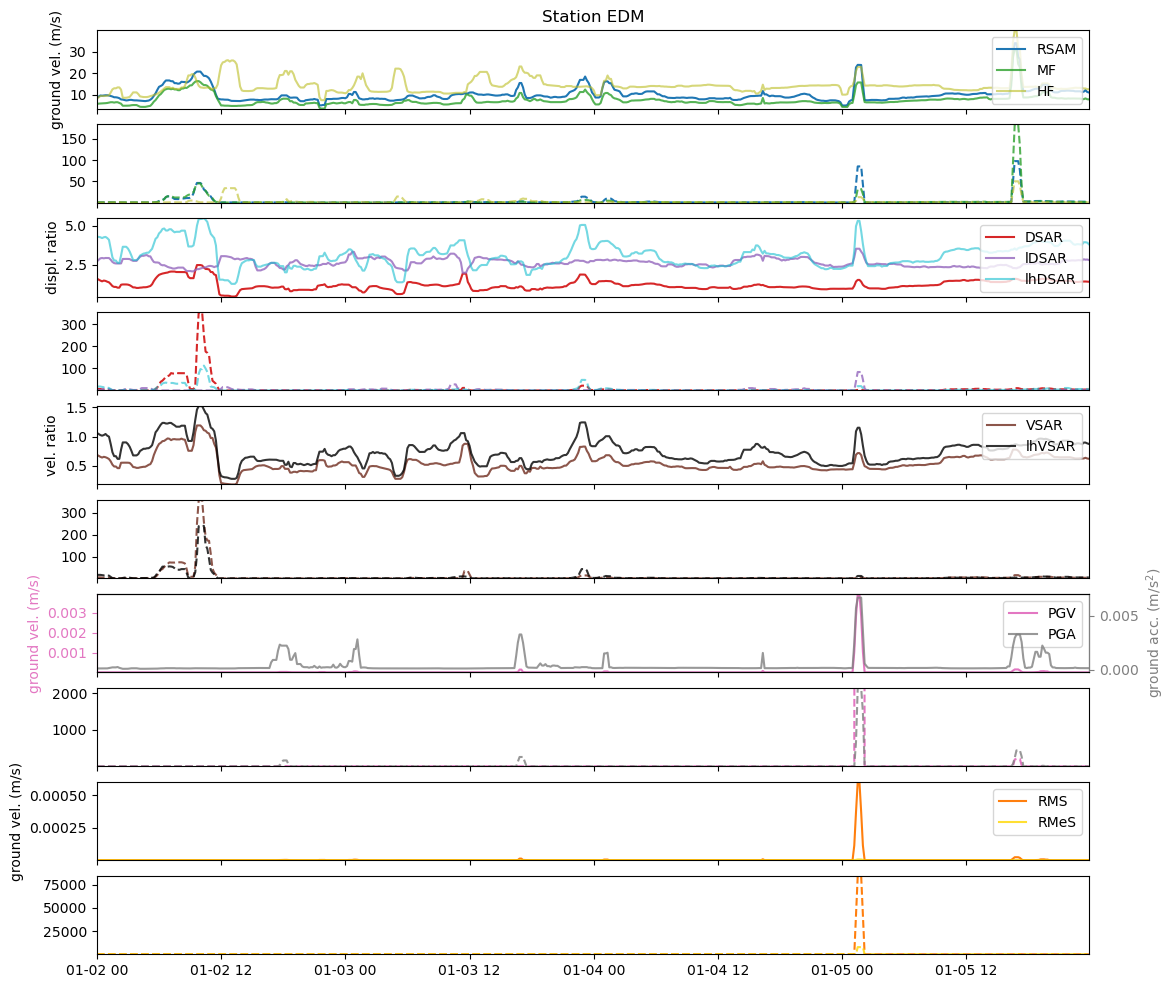

In [27]:
# crate figure LINEAR--------------------------------------------------------------------------------------------------------------------------
fig, (ax1, ax11, ax2, ax22, ax3, ax33, ax4, ax44, ax5, ax55) = plt.subplots(10,1, sharex=True, 
                                                                            figsize=(6.4*2, 4.8*0.25*10))

# start plototting seismic data ---------------------------------------------------------------------------------------------------------
ax1.plot(df['rsam'], label='RSAM', alpha=1)
ax1.plot(df['mf'], label='MF', alpha=0.8, color='C2')
ax1.plot(df['hf'], label='HF', alpha=0.6, color='C8')
ax1.set_ylim(min(df['rsam'].min(),df['mf'].min(),df['hf'].min()),max(df['rsam'].max(),df['mf'].max(),df['hf'].max()))

ax11.plot(df['zsc2_rsam'],linestyle='--', alpha=1)
ax11.plot(df['zsc2_mf'], linestyle='--', alpha=0.8, color='C2')
ax11.plot(df['zsc2_hf'], linestyle='--', alpha=0.6, color='C8')
ax11.set_ylim(min(df['zsc2_rsam'].min(),df['zsc2_mf'].min(),df['zsc2_hf'].min()),max(df['zsc2_rsam'].max(),df['zsc2_mf'].max(),df['zsc2_hf'].max()))

ax2.plot(df['dsar'], label='DSAR', alpha=1, color='C3')
ax2.plot(df['ldsar'], label='lDSAR', alpha=0.8, color='C4')
ax2.plot(df['lhdsar'], label='lhDSAR', alpha=0.6, color='C9')
ax2.set_ylim(min(df['dsar'].min(),df['ldsar'].min(),df['lhdsar'].min()),max(df['dsar'].max(),df['ldsar'].max(),df['lhdsar'].max()))

ax22.plot(df['zsc2_dsar'],linestyle='--', alpha=1, color='C3')
ax22.plot(df['zsc2_ldsar'], linestyle='--', alpha=0.8, color='C4')
ax22.plot(df['zsc2_lhdsar'], linestyle='--', alpha=0.6, color='C9')
ax22.set_ylim(min(df['zsc2_dsar'].min(),df['zsc2_ldsar'].min(),df['zsc2_lhdsar'].min()),
              max(df['zsc2_dsar'].max(),df['zsc2_ldsar'].max(),df['zsc2_lhdsar'].max()))

ax3.plot(df['vsar'], label='VSAR', alpha=1, color='C5')
ax3.plot(df['lhvsar'], label='lhVSAR', alpha=0.8, color='k')
ax3.set_ylim(min(df['vsar'].min(),df['lhvsar'].min()),max(df['vsar'].max(),df['lhvsar'].max()))

ax33.plot(df['zsc2_vsar'], linestyle='--', alpha=1, color='C5')
ax33.plot(df['zsc2_lhvsar'], linestyle='--', alpha=0.8, color='k')
ax33.set_ylim(min(df['zsc2_vsar'].min(),df['zsc2_lhvsar'].min()),max(df['zsc2_vsar'].max(),df['zsc2_lhvsar'].max()))

ax444 = ax4.twinx()
ax4.plot(df['pgv'], label='PGV', alpha=1, color='C6')
ax4.plot(np.nan, label='PGA', alpha=0.8, color='C7')
ax444.plot(df['pga'], label='PGA', alpha=0.8, color='C7')
ax4.set_ylim(df['pgv'].min(),df['pgv'].max())
ax44.set_ylim(df['pga'].min(),df['pga'].max())

ax44.plot(df['zsc2_pgv'], linestyle='--', alpha=1, color='C6')
ax44.plot(df['zsc2_pga'], linestyle='--', alpha=0.8, color='C7')
ax44.set_ylim(min(df['zsc2_pgv'].min(),df['zsc2_pga'].min()),max(df['zsc2_pga'].max(),df['zsc2_pga'].max()))

ax5.plot(df['rms'], label='RMS', alpha=1, color='C1')
ax5.plot(df['rmes'], label='RMeS', alpha=0.8, color='gold')
ax5.set_ylim(min(df['rms'].min(),df['rmes'].min()),max(df['rms'].max(),df['rmes'].max()))

ax55.plot(df['zsc2_rms'], linestyle='--', alpha=1, color='C1')
ax55.plot(df['zsc2_rmes'], linestyle='--', alpha=0.8, color='gold')
ax55.set_ylim(min(df['zsc2_rms'].min(),df['zsc2_rmes'].min()),max(df['zsc2_rms'].max(),df['zsc2_rmes'].max()))

# title, legende, and scale ------------------------------------------------------------------------------------------------------------ax1.set_title('Station {}'.format(sta))
ax1.set_title('Station {}'.format(sta))
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
ax5.legend(loc='upper right')

ax1.set_xlim(df.index[0], df.index[-1])

ax1.set_ylabel('ground vel. (m/s)')
ax2.set_ylabel('displ. ratio')
ax3.set_ylabel('vel. ratio')
ax4.set_ylabel('ground vel. (m/s)', color='C6')
ax444.set_ylabel('ground acc. (m/s$^2$)', color='C7')
ax5.set_ylabel('ground vel. (m/s)')

# color ticks and spines
ax4.spines['left'].set_color('C6')
ax4.xaxis.label.set_color('C6')
ax4.tick_params(axis='y', colors='C6')

ax444.spines['right'].set_color('C7')
ax444.xaxis.label.set_color('C7')
ax444.tick_params(axis='y', colors='C7')

# save plot and show -----------------------------------------------------------------------------------------------------------------
plt.savefig(dirpath+'{}_lin_roll1H.png'.format(sta), dpi=300, bbox_inches='tight')
fig.show()
